<a href="https://colab.research.google.com/github/ganesh10-code/ML_lab/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

                   Features  Importance
1                   Glucose    0.487580
5                       BMI    0.198518
7                       Age    0.176927
2             BloodPressure    0.060501
6  DiabetesPedigreeFunction    0.057969
4                   Insulin    0.011733
0               Pregnancies    0.006771
3             SkinThickness    0.000000


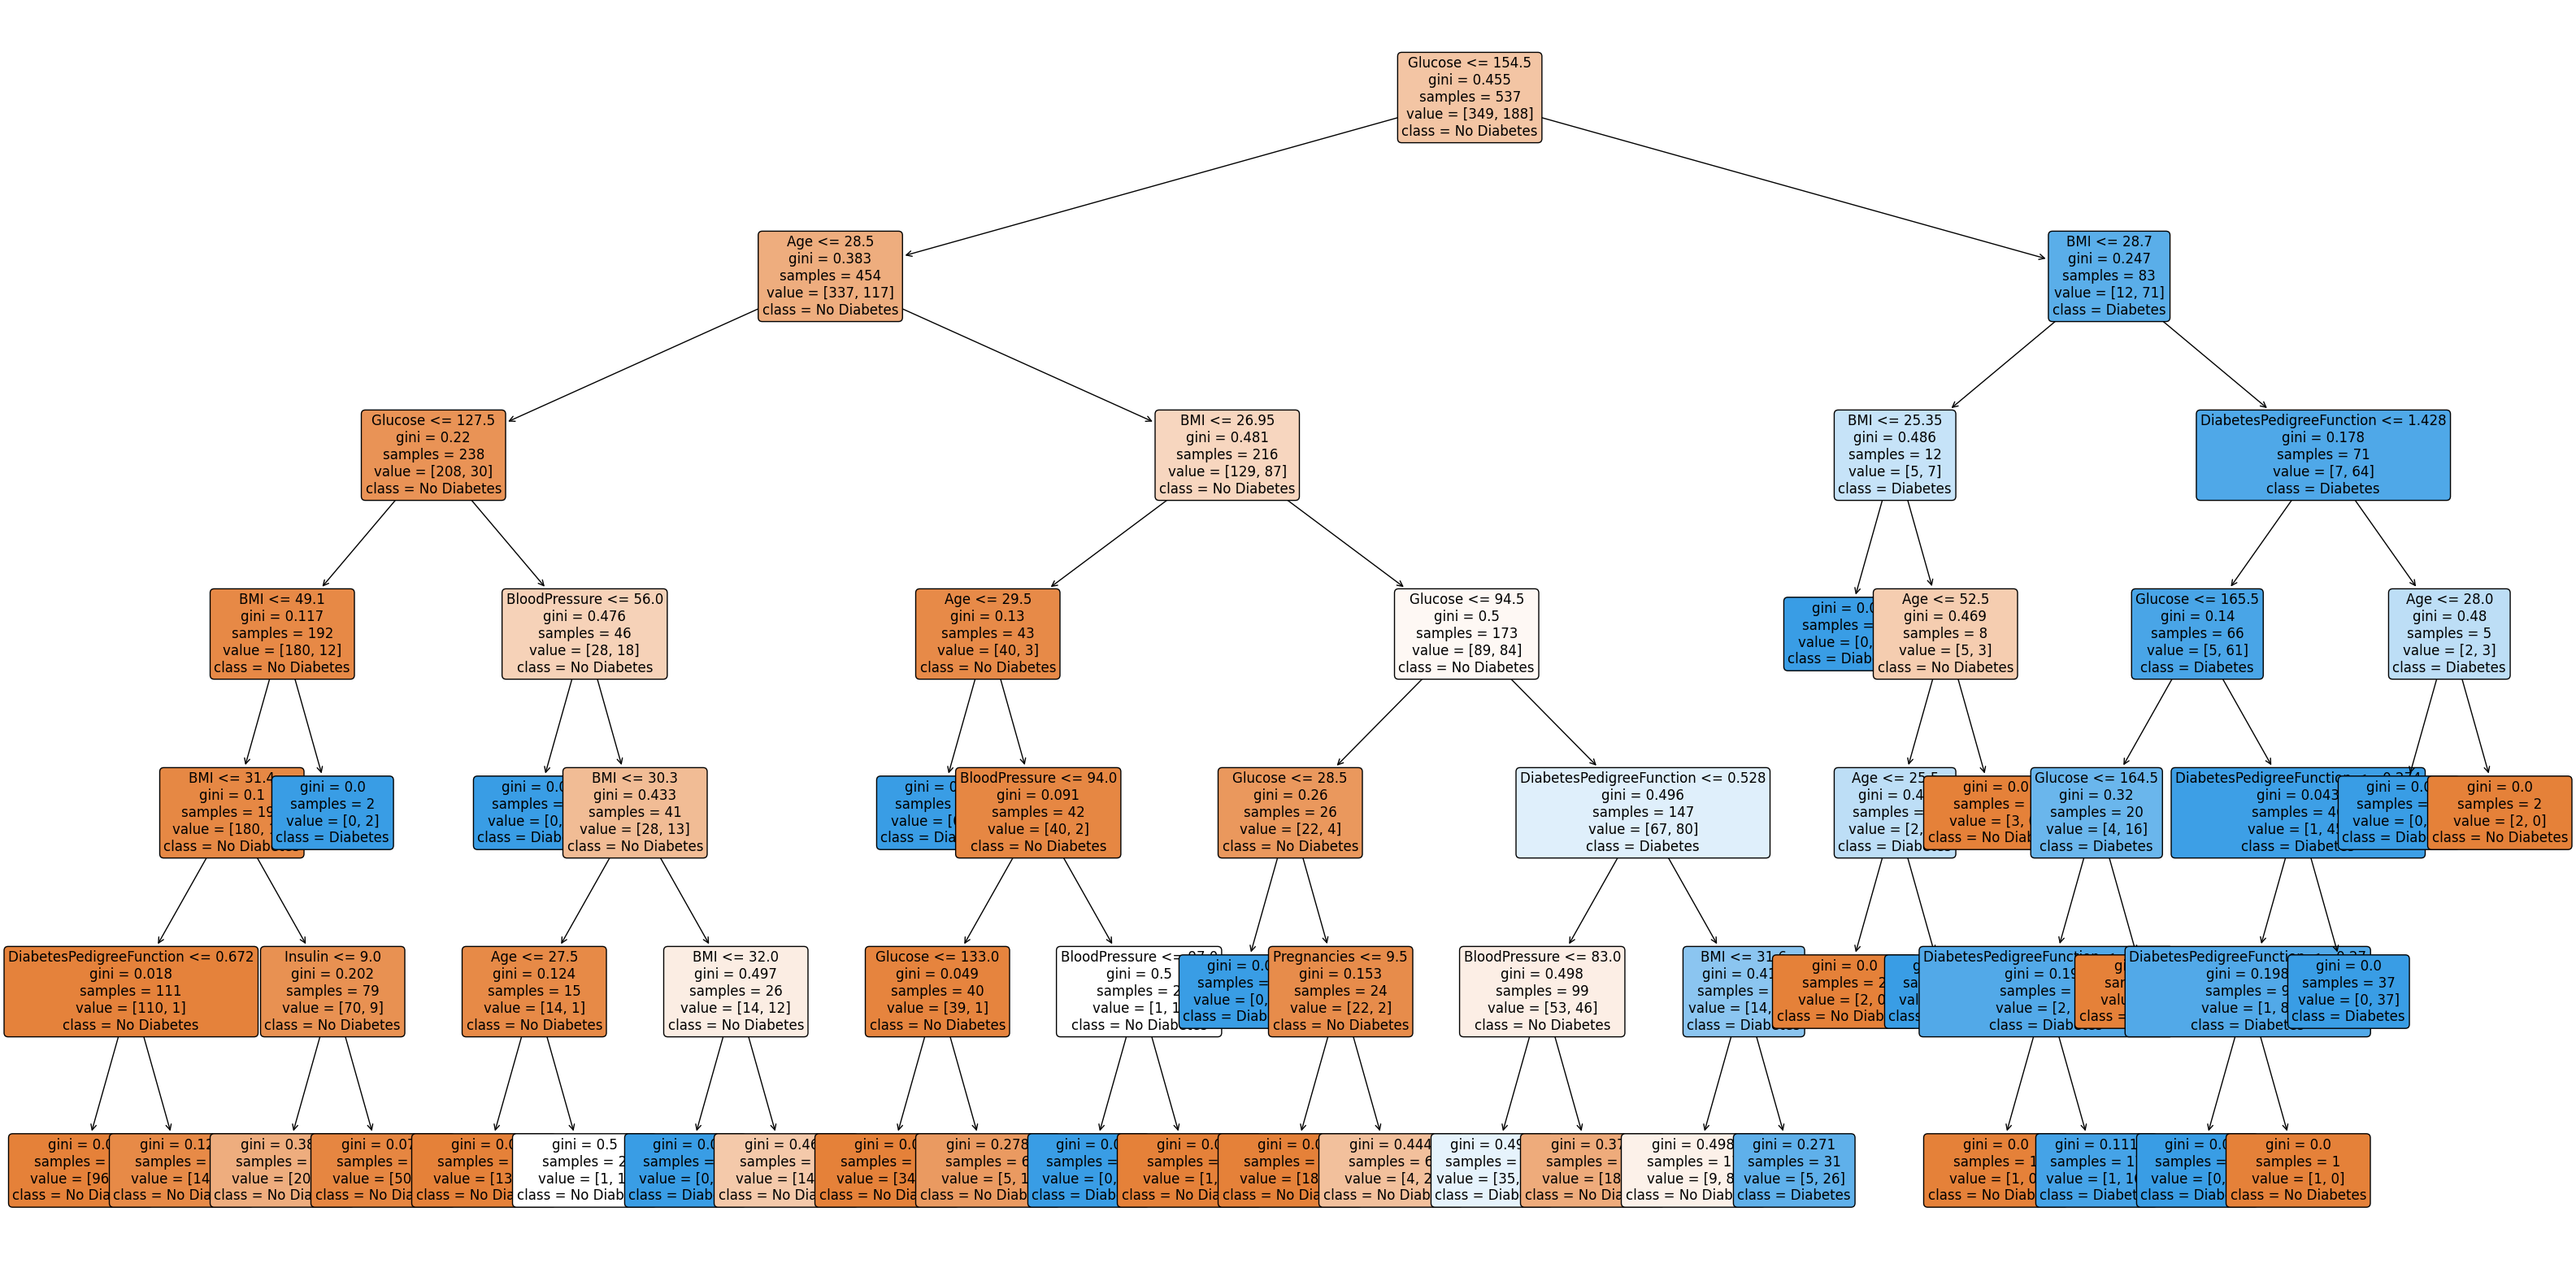

Accuracy:0.697
Confusion Matrix:
 [[109  42]
 [ 28  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.65      0.60        80

    accuracy                           0.70       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231



In [ ]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_DT.csv')
target='Outcome'
X = data.drop(columns=[target])
Y = data[target]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

dtc = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=6)
dtc.fit(X_train,Y_train)

#Feature Importance
feature_importance= dtc.feature_importances_
important_features=pd.DataFrame({'Features':X.columns,'Importance':feature_importance}).sort_values(by="Importance",ascending=False)
print(important_features)

#Tree Structure
plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names=list(X.columns),class_names=['No Diabetes','Diabetes'],filled=True,rounded=True, fontsize=12)
plt.show()

#Accuracy Score
accuracy=dtc.score(X_test,Y_test)
print(f'Accuracy:{accuracy:.3f}')

Y_pred=dtc.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n", classification_report(Y_test,Y_pred))


# Naive Bayes

In [ ]:
#Naive Bayes Model on Loan Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

#Loading the dataset
df=pd.read_csv('/kaggle/input/loan-default-dataset/Loan_Default.csv')


#Data preprocessing for model training
df=df.drop(columns=['ID'])

categorical_features=df.select_dtypes(include=['object']).columns

#handling missing values
for col in df.columns:
    if col in categorical_features:     #categorical
        df[col]=df[col].fillna('Missing')
    else:                             #numeric
        df[col]=df[col].fillna(df[col].mean())

#Encoding categorical features
le=LabelEncoder()
for col in categorical_features:
    df[col]=le.fit_transform(df[col])

#splitting into Features and target
target="Status"
X=df.drop(columns=[target])
Y=df[target]

#Splitting the train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

#Initializing the Naive Bayes Model
nb=GaussianNB()

#Training the model
nb.fit(X_train,Y_train)

#predicting the test samples
Y_pred=nb.predict(X_test)

#performance Metrics
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix: \n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Accuracy:  0.9065043384677474
Confusion Matrix: 
 [[29592  4095]
 [   75 10839]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     33687
           1       0.73      0.99      0.84     10914

    accuracy                           0.91     44601
   macro avg       0.86      0.94      0.89     44601
weighted avg       0.93      0.91      0.91     44601



# Support Vector Machine

In [ ]:
#Support Vector Classification
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#Loading the dataset
dataset=load_breast_cancer()
X=pd.DataFrame(dataset.data,columns=dataset.feature_names)
Y=pd.Series(dataset.target)

#Splitting the data into test & train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

#Initializing Scaler to standardize features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#Initializing the SVC model
svm_clf=SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
svm_clf.fit(X_train,Y_train)   #Training with train data

#predicting for test data
Y_pred=svm_clf.predict(X_test)

#Evaluating the model
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Accuracy:  0.9824561403508771
Confusion Matrix:
 [[ 61   2]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# K-Nearest Neighbor (KNN)

In [ ]:
#KNN on Iris Dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

#Loading the IRIS Dataset
data=load_iris()

X=pd.DataFrame(data.data, columns=data.feature_names)
Y=pd.Series(data.target)

#Splitting the data into train & test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

#Standardizing the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#Initialize KNN model
knn=KNN(n_neighbors=6,metric='minkowski',p=2)
knn.fit(X_train,Y_train)

#prediction
Y_pred=knn.predict(X_test)

#Evaluating performance
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Accuracy:  0.9555555555555556
Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

